In [1]:
%load_ext wurlitzer
import glob
import os
import numpy as np
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4
os.chdir('other_obs')


1 spectrum  in use
 
Spectral Data File: P0822210101PNS003SRSPEC000B.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.432e-03 +/- 3.891e-04 (53.8 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-6
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 3.007e+04 sec
 Using fit statistic: chi
 Using Background File                P0822210101PNS003BGSPEC000B.FTZ
  Background Exposure Time: 3.007e+04 sec
 Using Response (RMF) File            epn_e3_ff20_sdY8.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0822210101PNS003SRCARF000B.FTZ

Net count rate (cts/s) for Spectrum:1  2.432e-03 +/- 3.891e-04 (53.8 % total)
Spectrum 1  Spectral Data File: P0822210101PNS003SRSPEC000B.FTZ
Net count rate (cts/s) for Spectrum:1  2.432e-03 +/- 3.891e-04 (53.8 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-6
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 3.007e+04 sec
 Using fit statistic: chi
 Using Ba

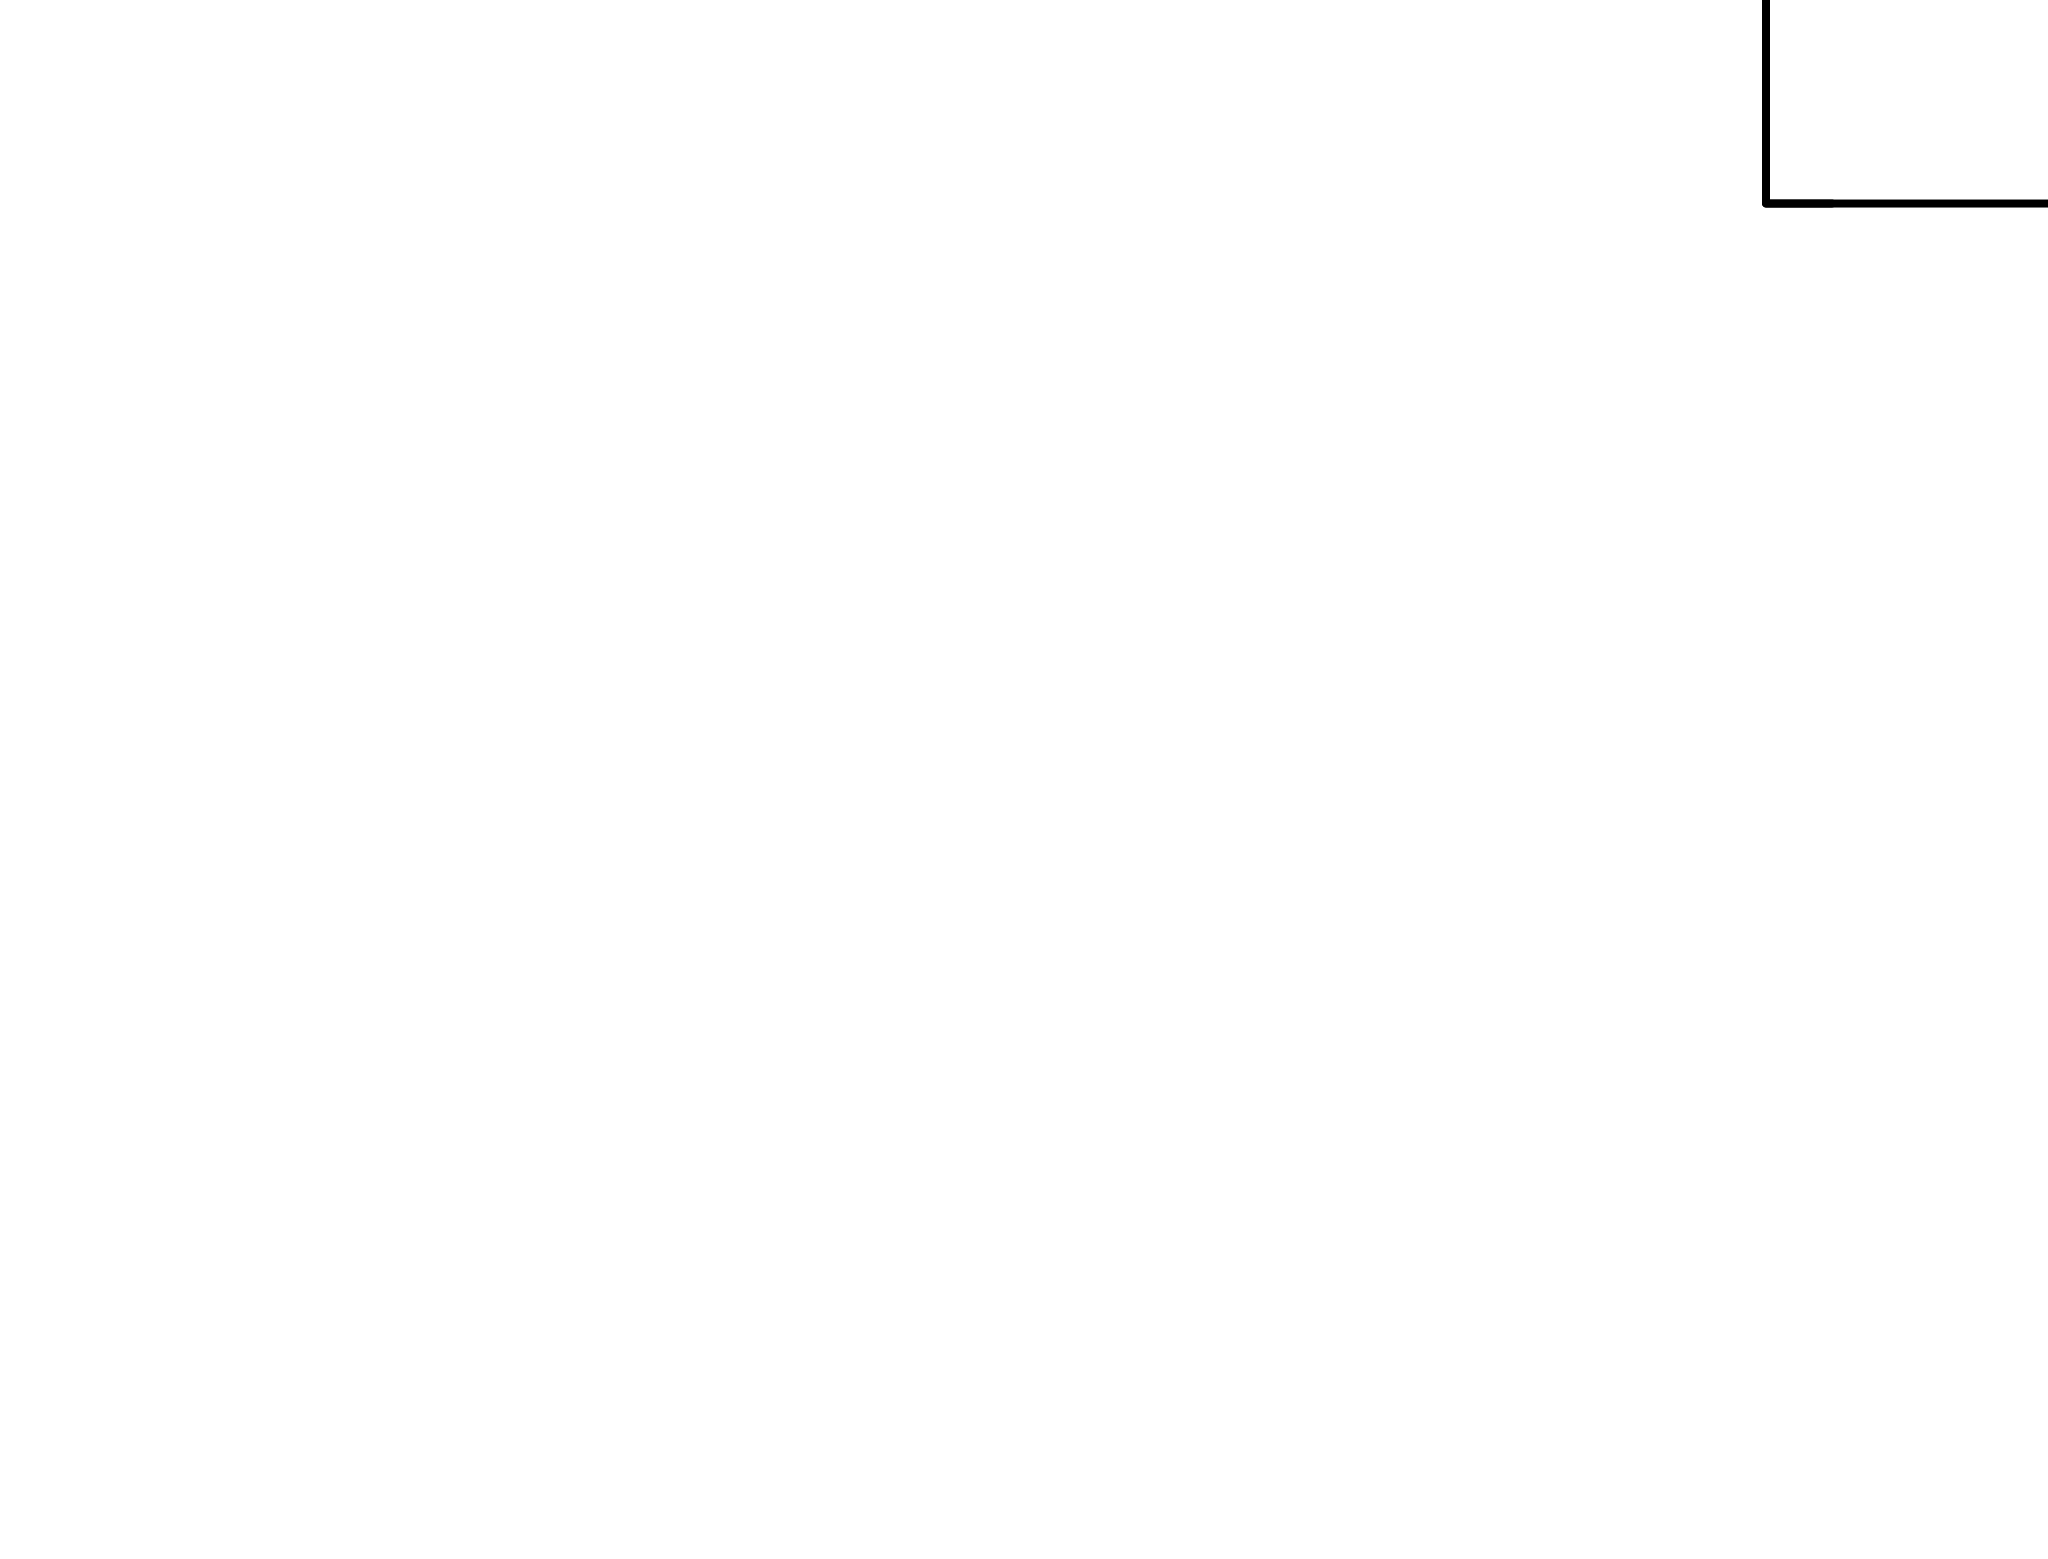

In [2]:
spec = Spectrum('P0822210101PNS003SRSPEC000B.FTZ',backFile='P0822210101PNS003BGSPEC000B.FTZ')
spec.response.arf='P0822210101PNS003SRCARF000B.FTZ'

Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.000001 0.001")
Plot("data")
#spec.ignore("**-0.2 12.0-**")

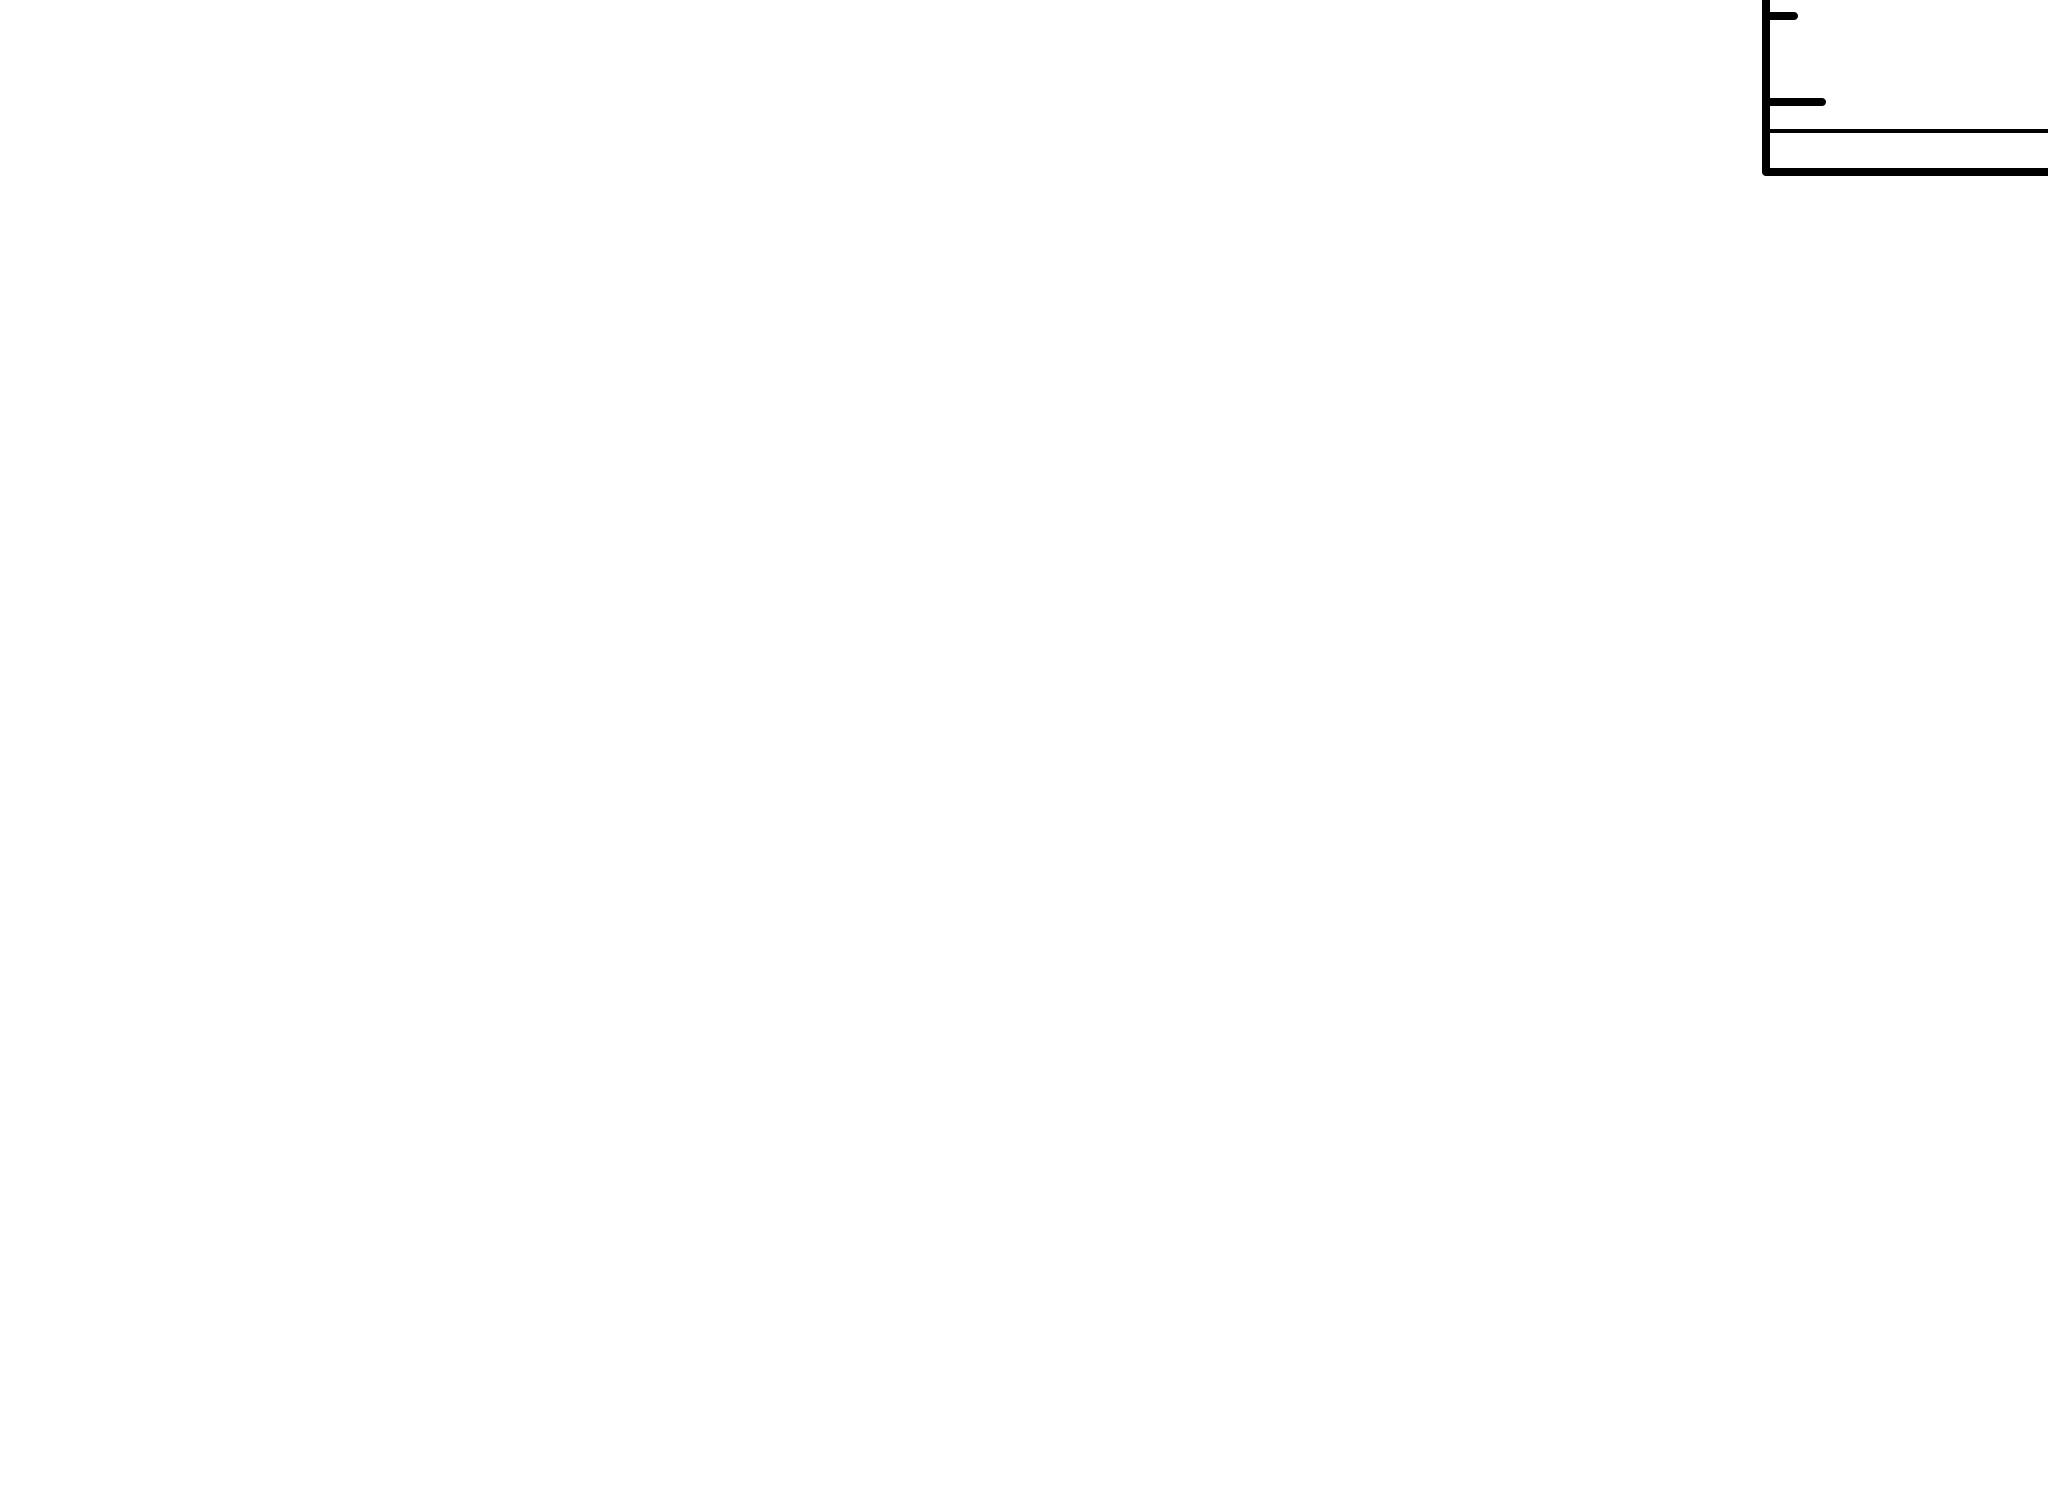


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              9.876308e+12     using 6 bins.

Tes

In [3]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              6.066883e+11     using 6 bins.

Test statistic : Chi-Squared              6.066883e+11     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
41.0789      2.48039      -3       2.00326       77.9128   2.73389e-06
13.3154      651485       -4       13.4601       199.117   3.38731e-05
10.2141      89182        -1       3.56194       199.086   3.37426e-05
5.2

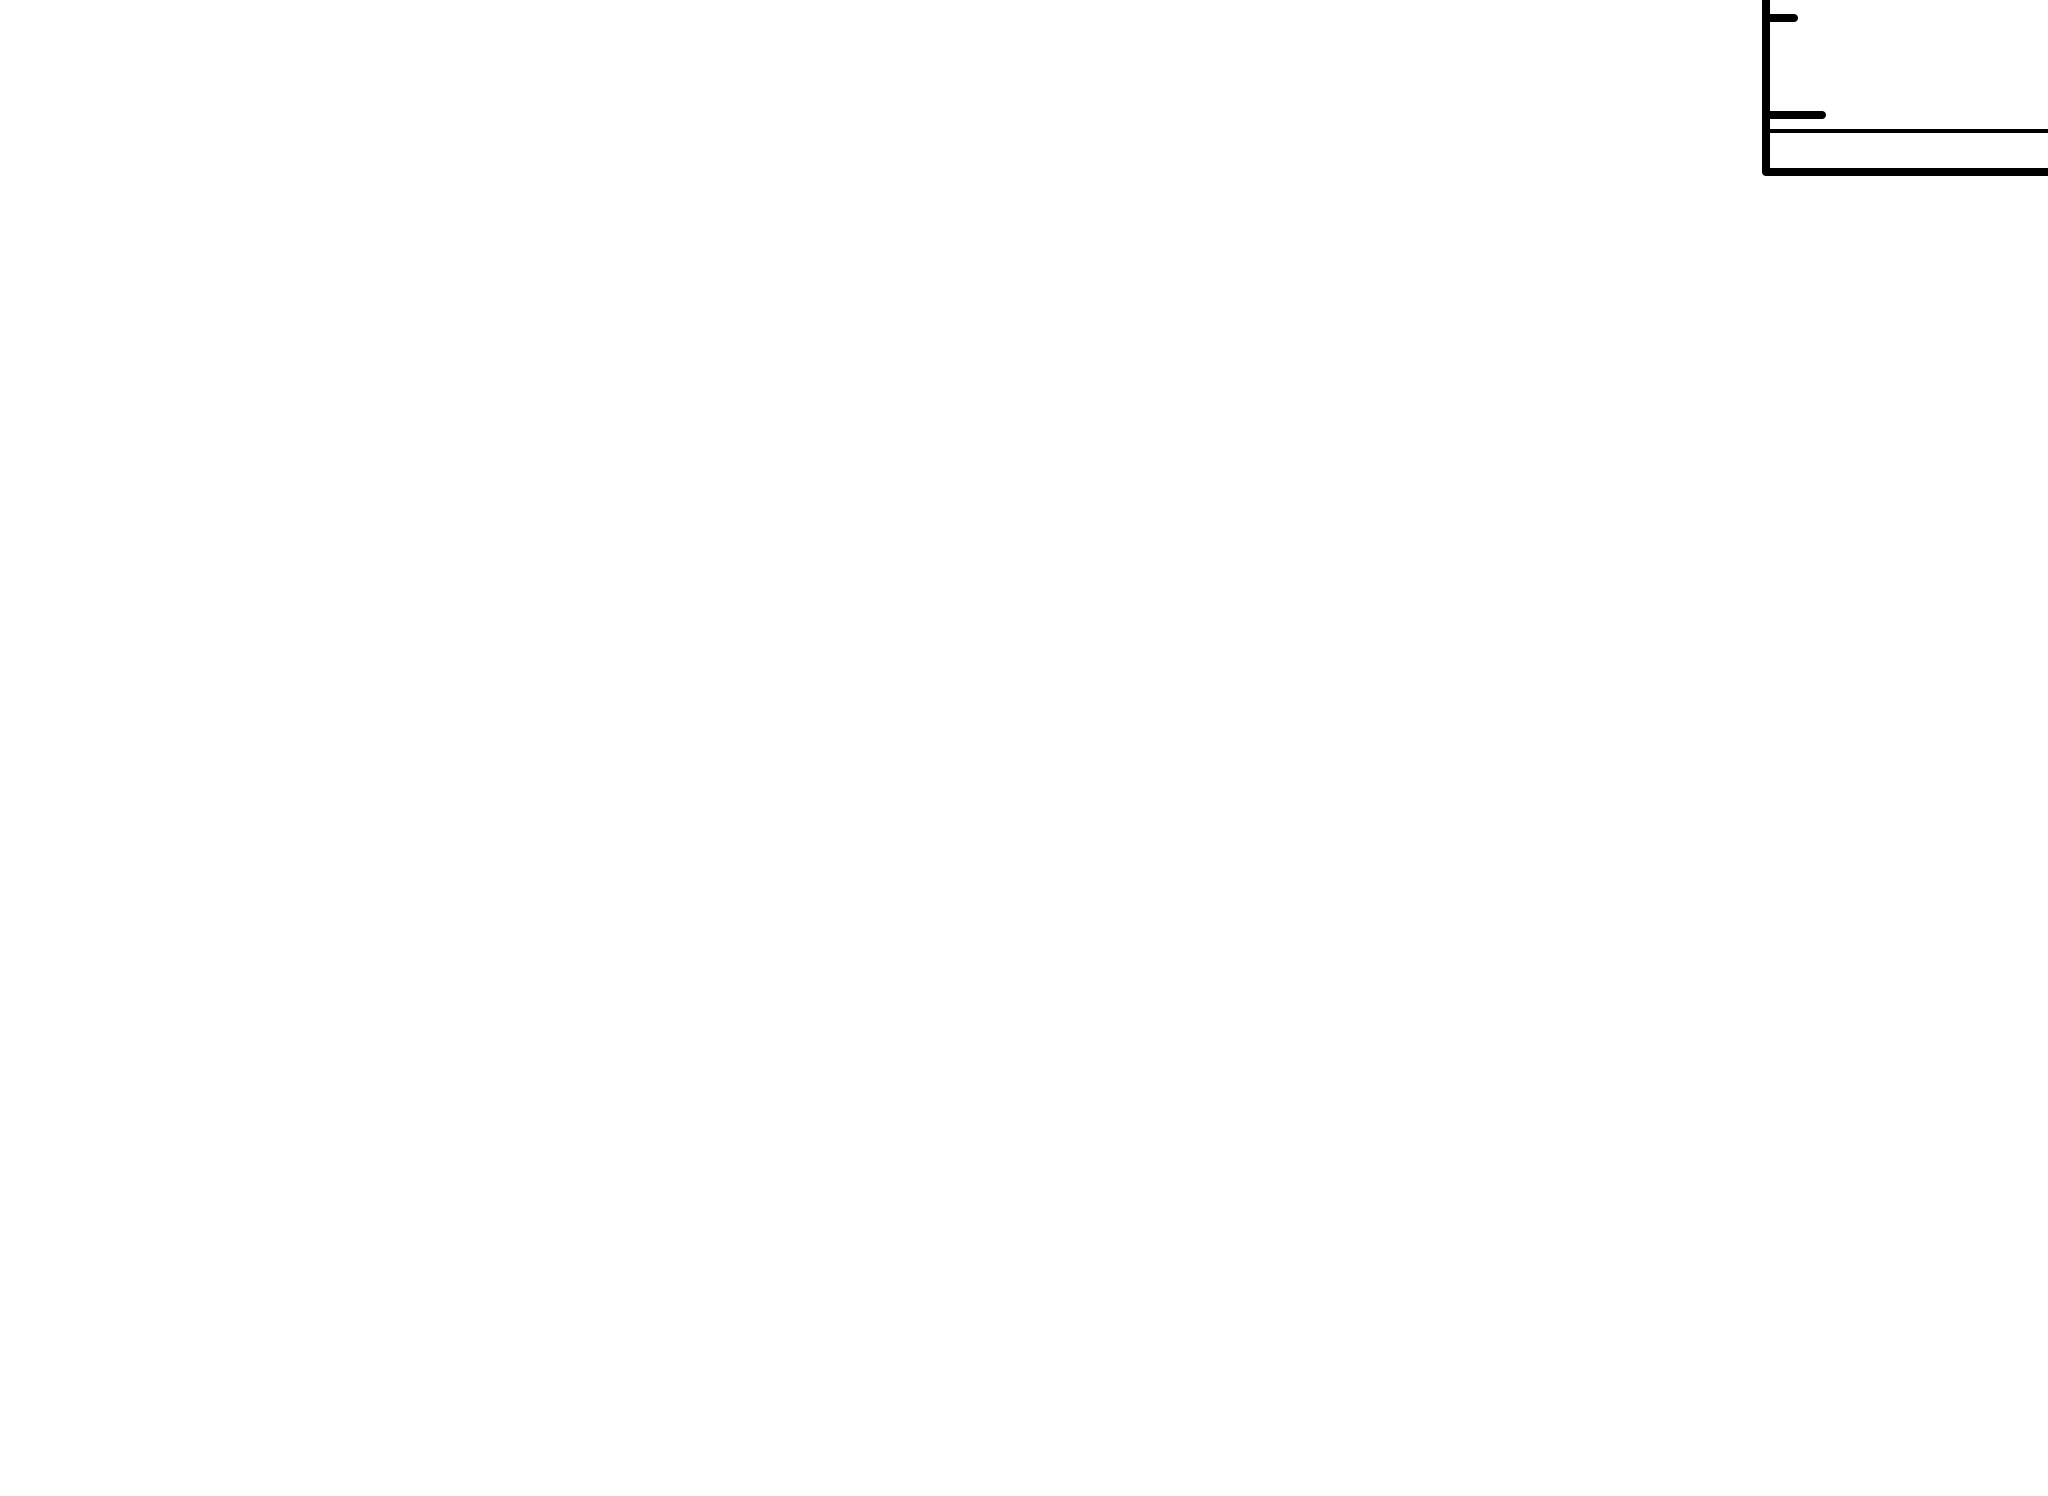

In [4]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")

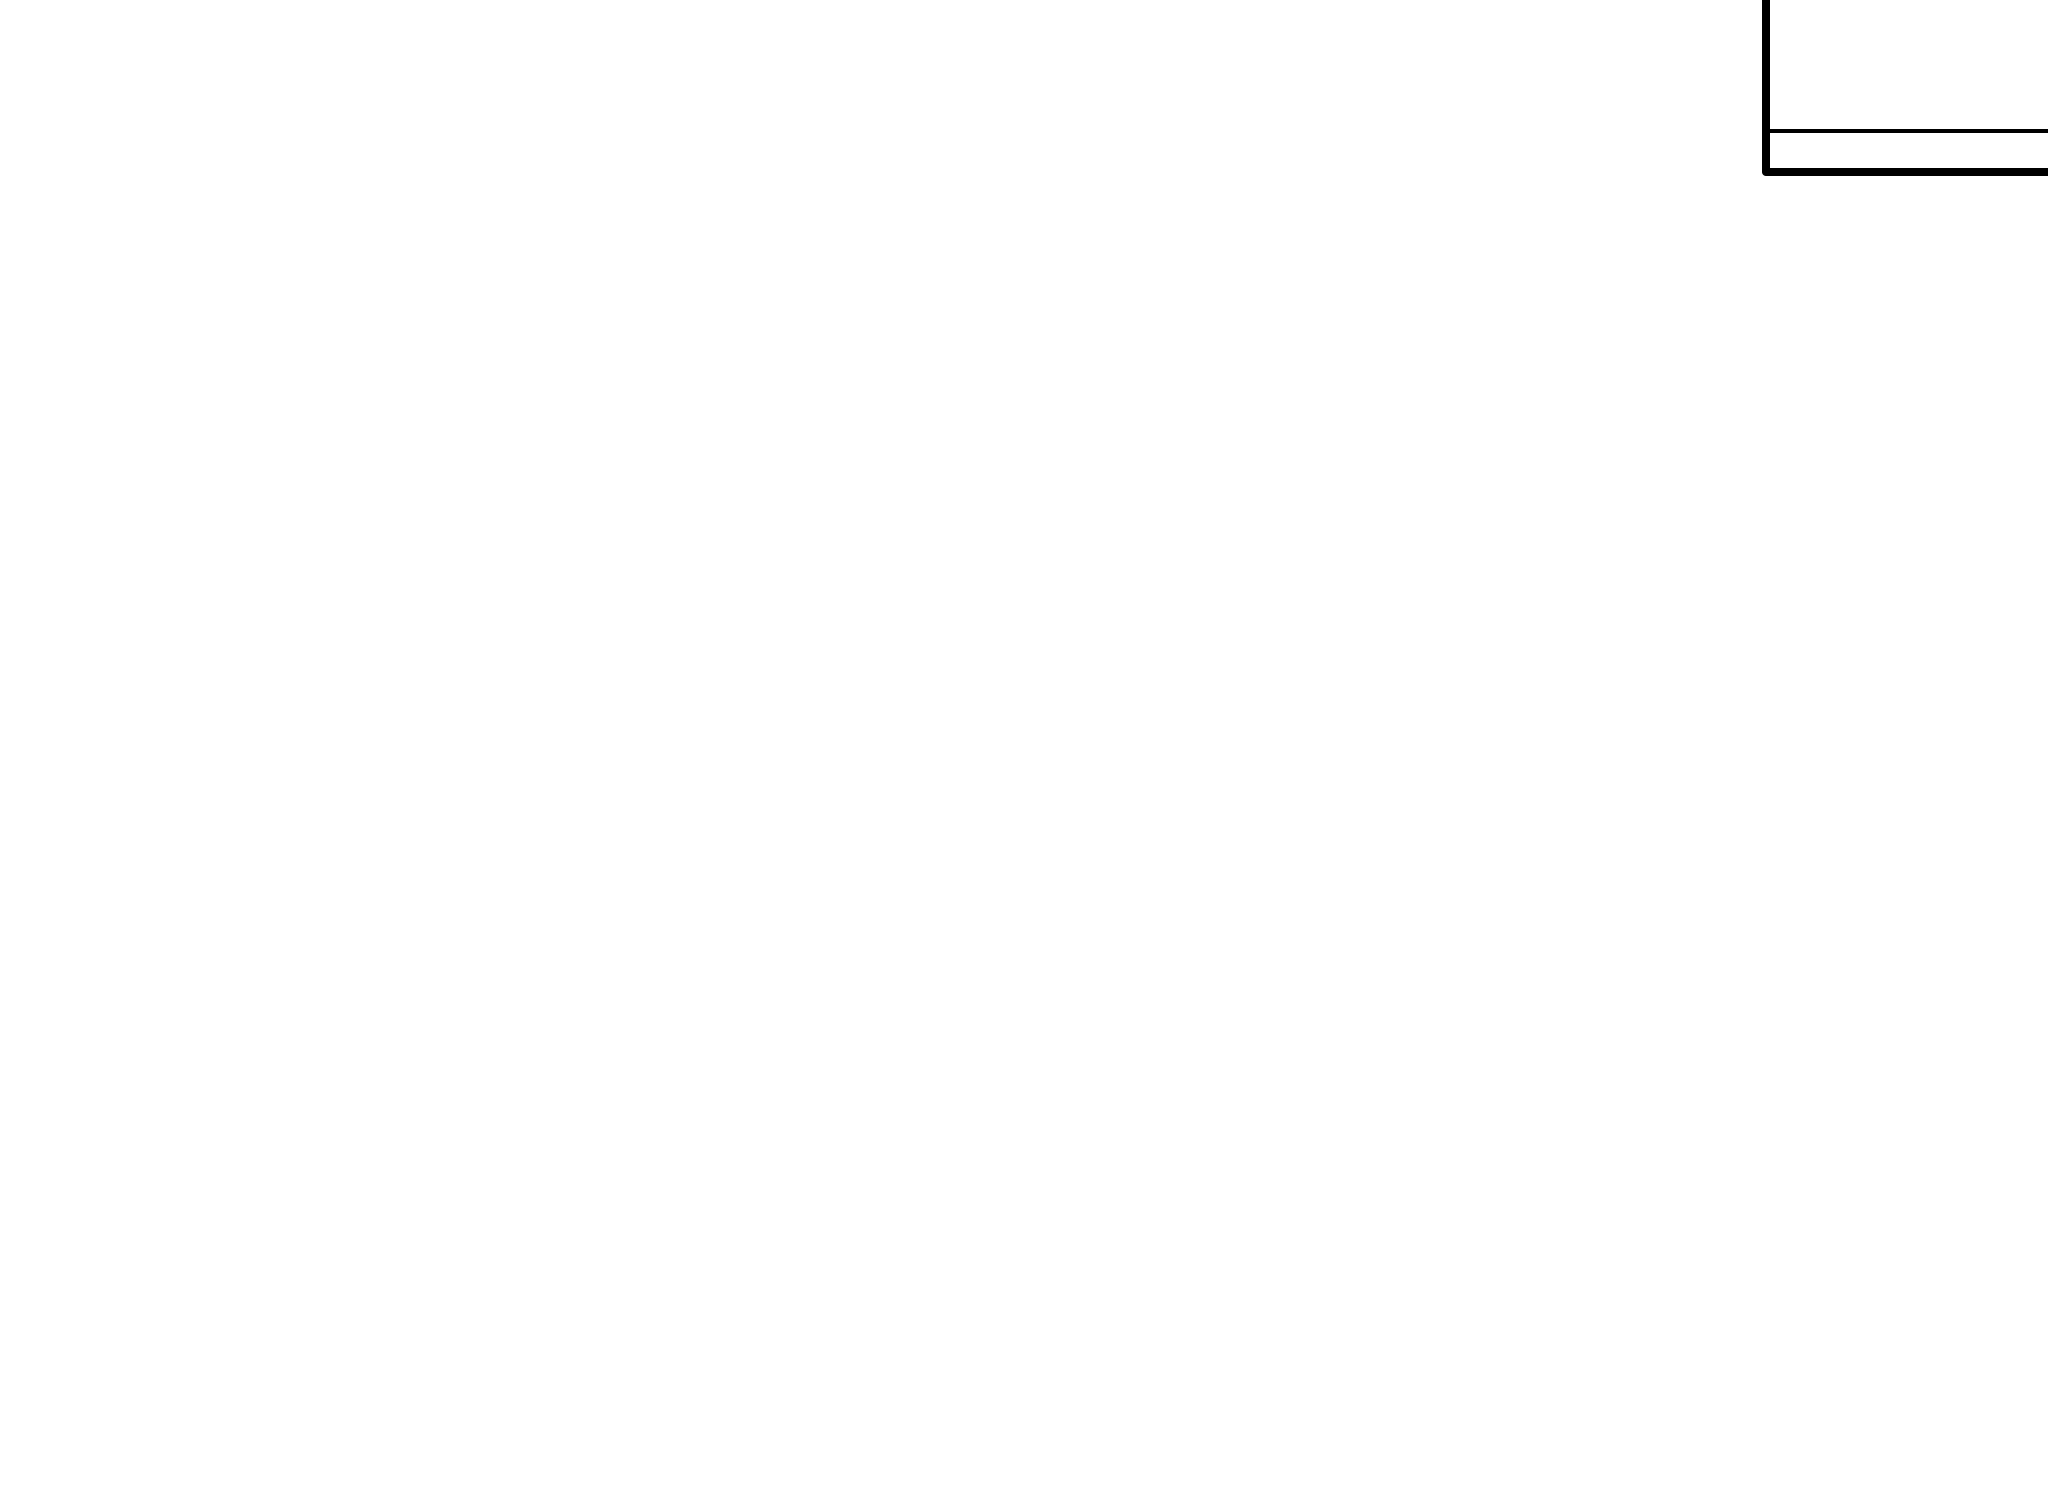


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              2.604305e+11     using 6 bins.

Test statistic : Chi-Squared              2.604305e+11     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
 Due to zero model norms, the following fit parameters are tem

In [5]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.834764e+12     using 6 bins.

Test statistic : Chi-Squared              2.834764e+12     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
10.1383      5.25857      -3       2.98476      0.586700   4.36576e-06
6.81268      1.33592e+06  -4       5.60137       1.17060   8.21930e-06
5.07627      299858       -5       5.43329       1.14198   9.69967e-06
5

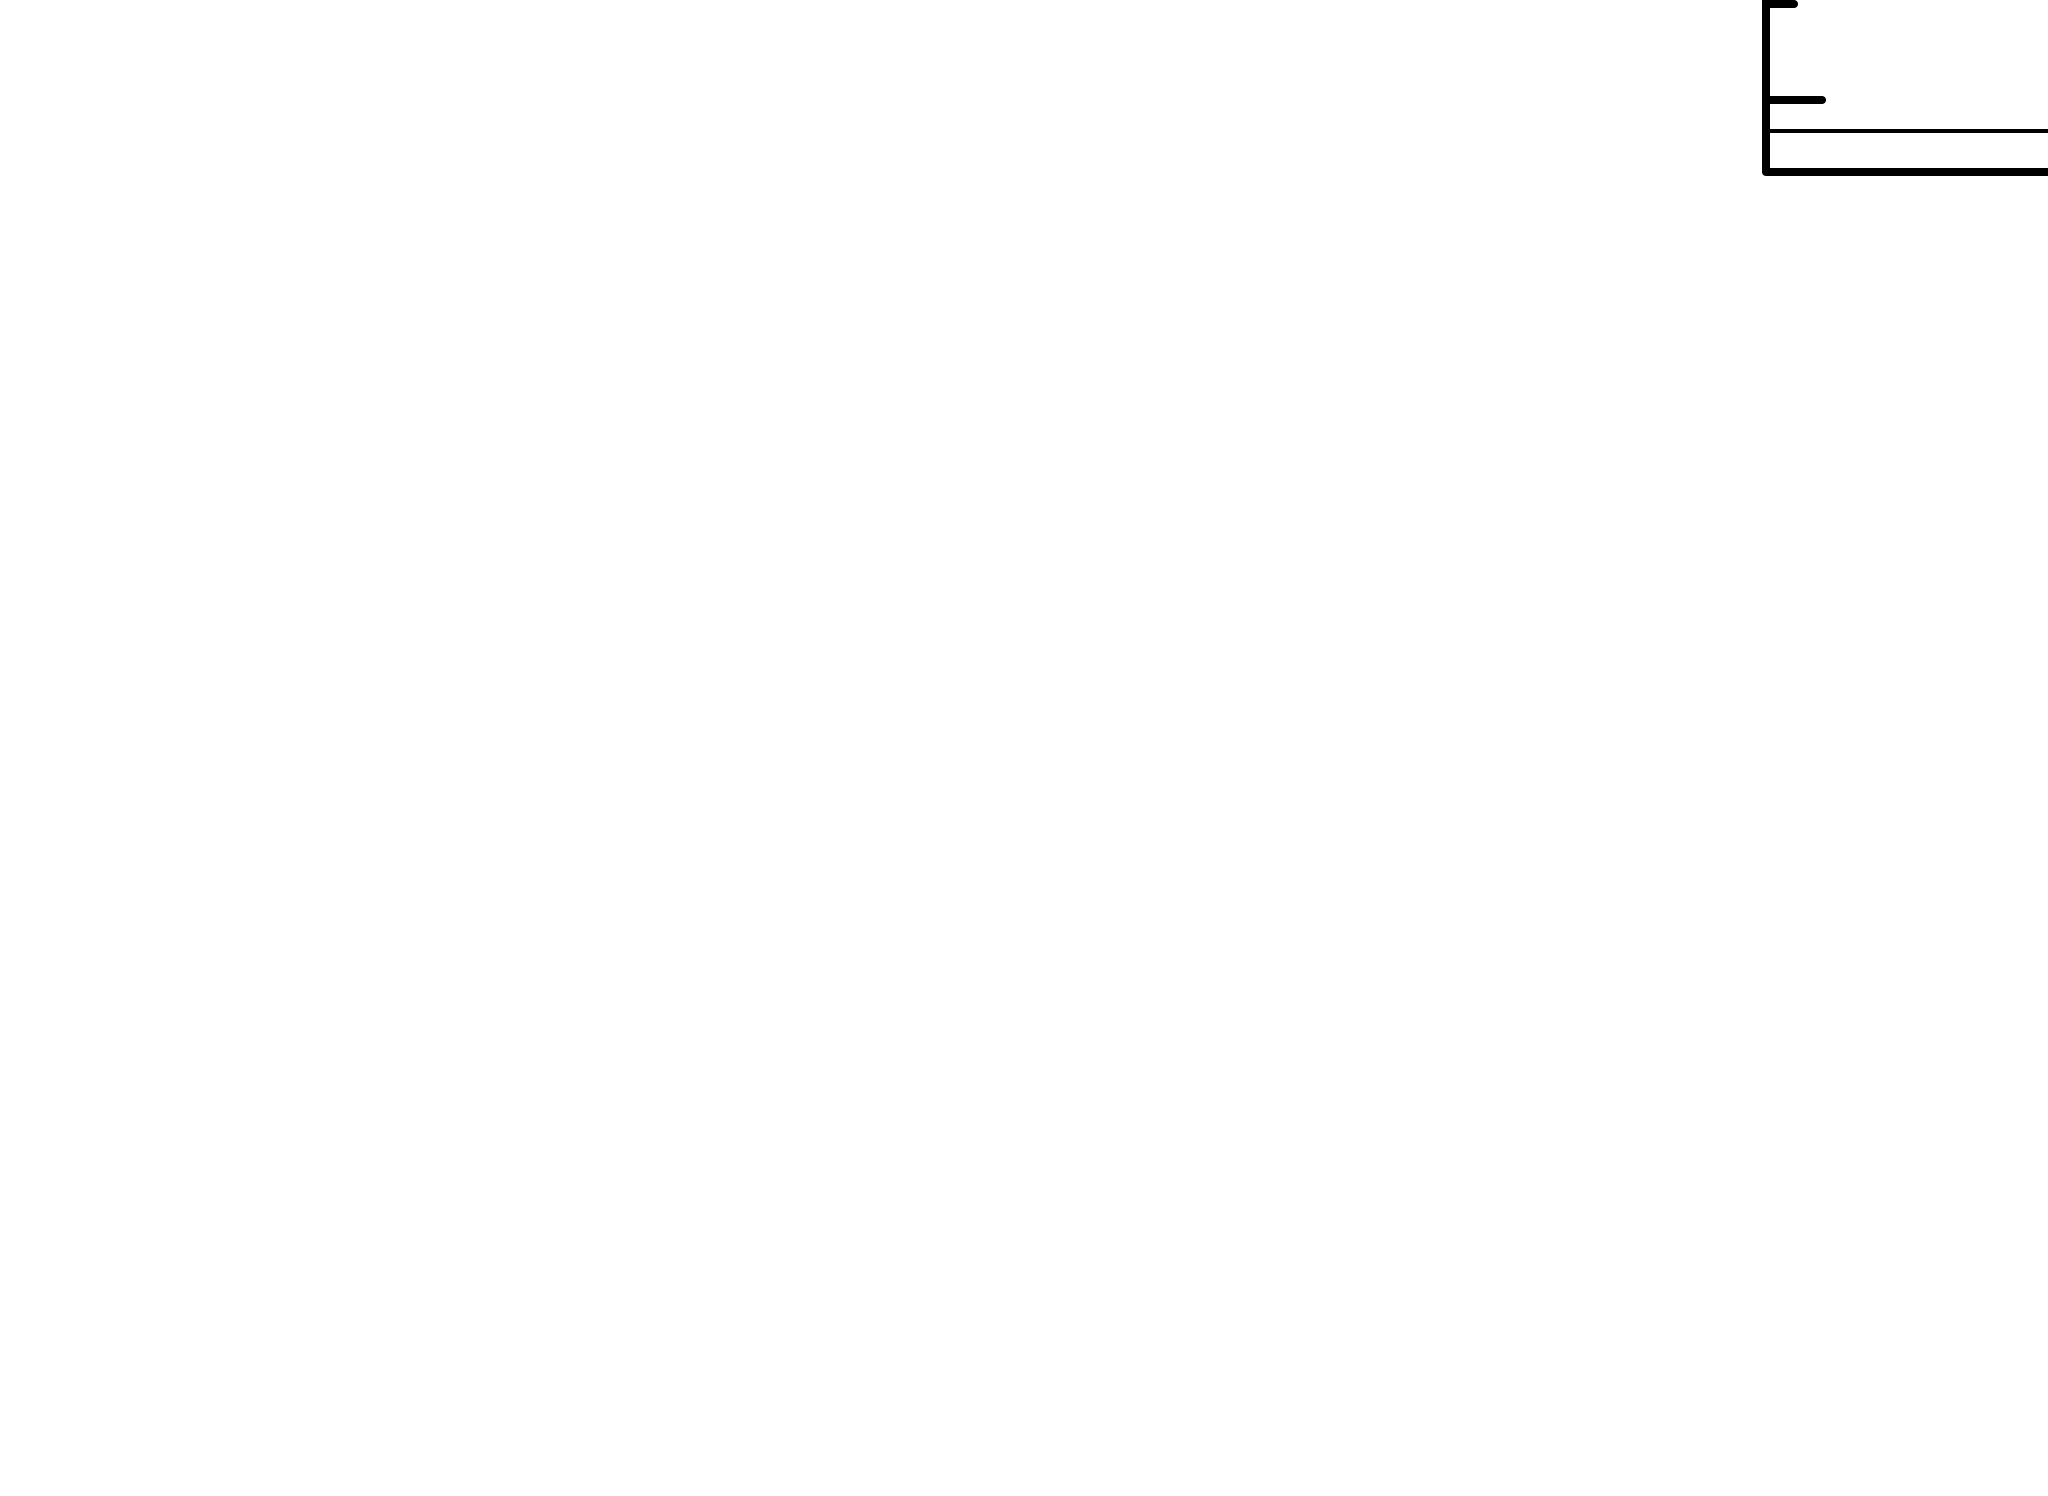

In [6]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")

In [7]:
AllModels.calcFlux(".2 12.0")

 Model Flux 9.2252e-06 photons (9.3129e-14 ergs/cm^2/s) range (0.20000 - 12.000 keV)



1 spectrum  in use
 
Spectral Data File: 0916811501_PN8grpspec.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.695e-03 +/- 1.333e-03 (9.9 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-7
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.134e+04 sec
 Using fit statistic: chi
 Using Background File                0916811501_PN8spec_bkg.fits
  Background Exposure Time: 1.134e+04 sec
 Using Response (RMF) File            0916811501_PN8spec.rmf for Source 1



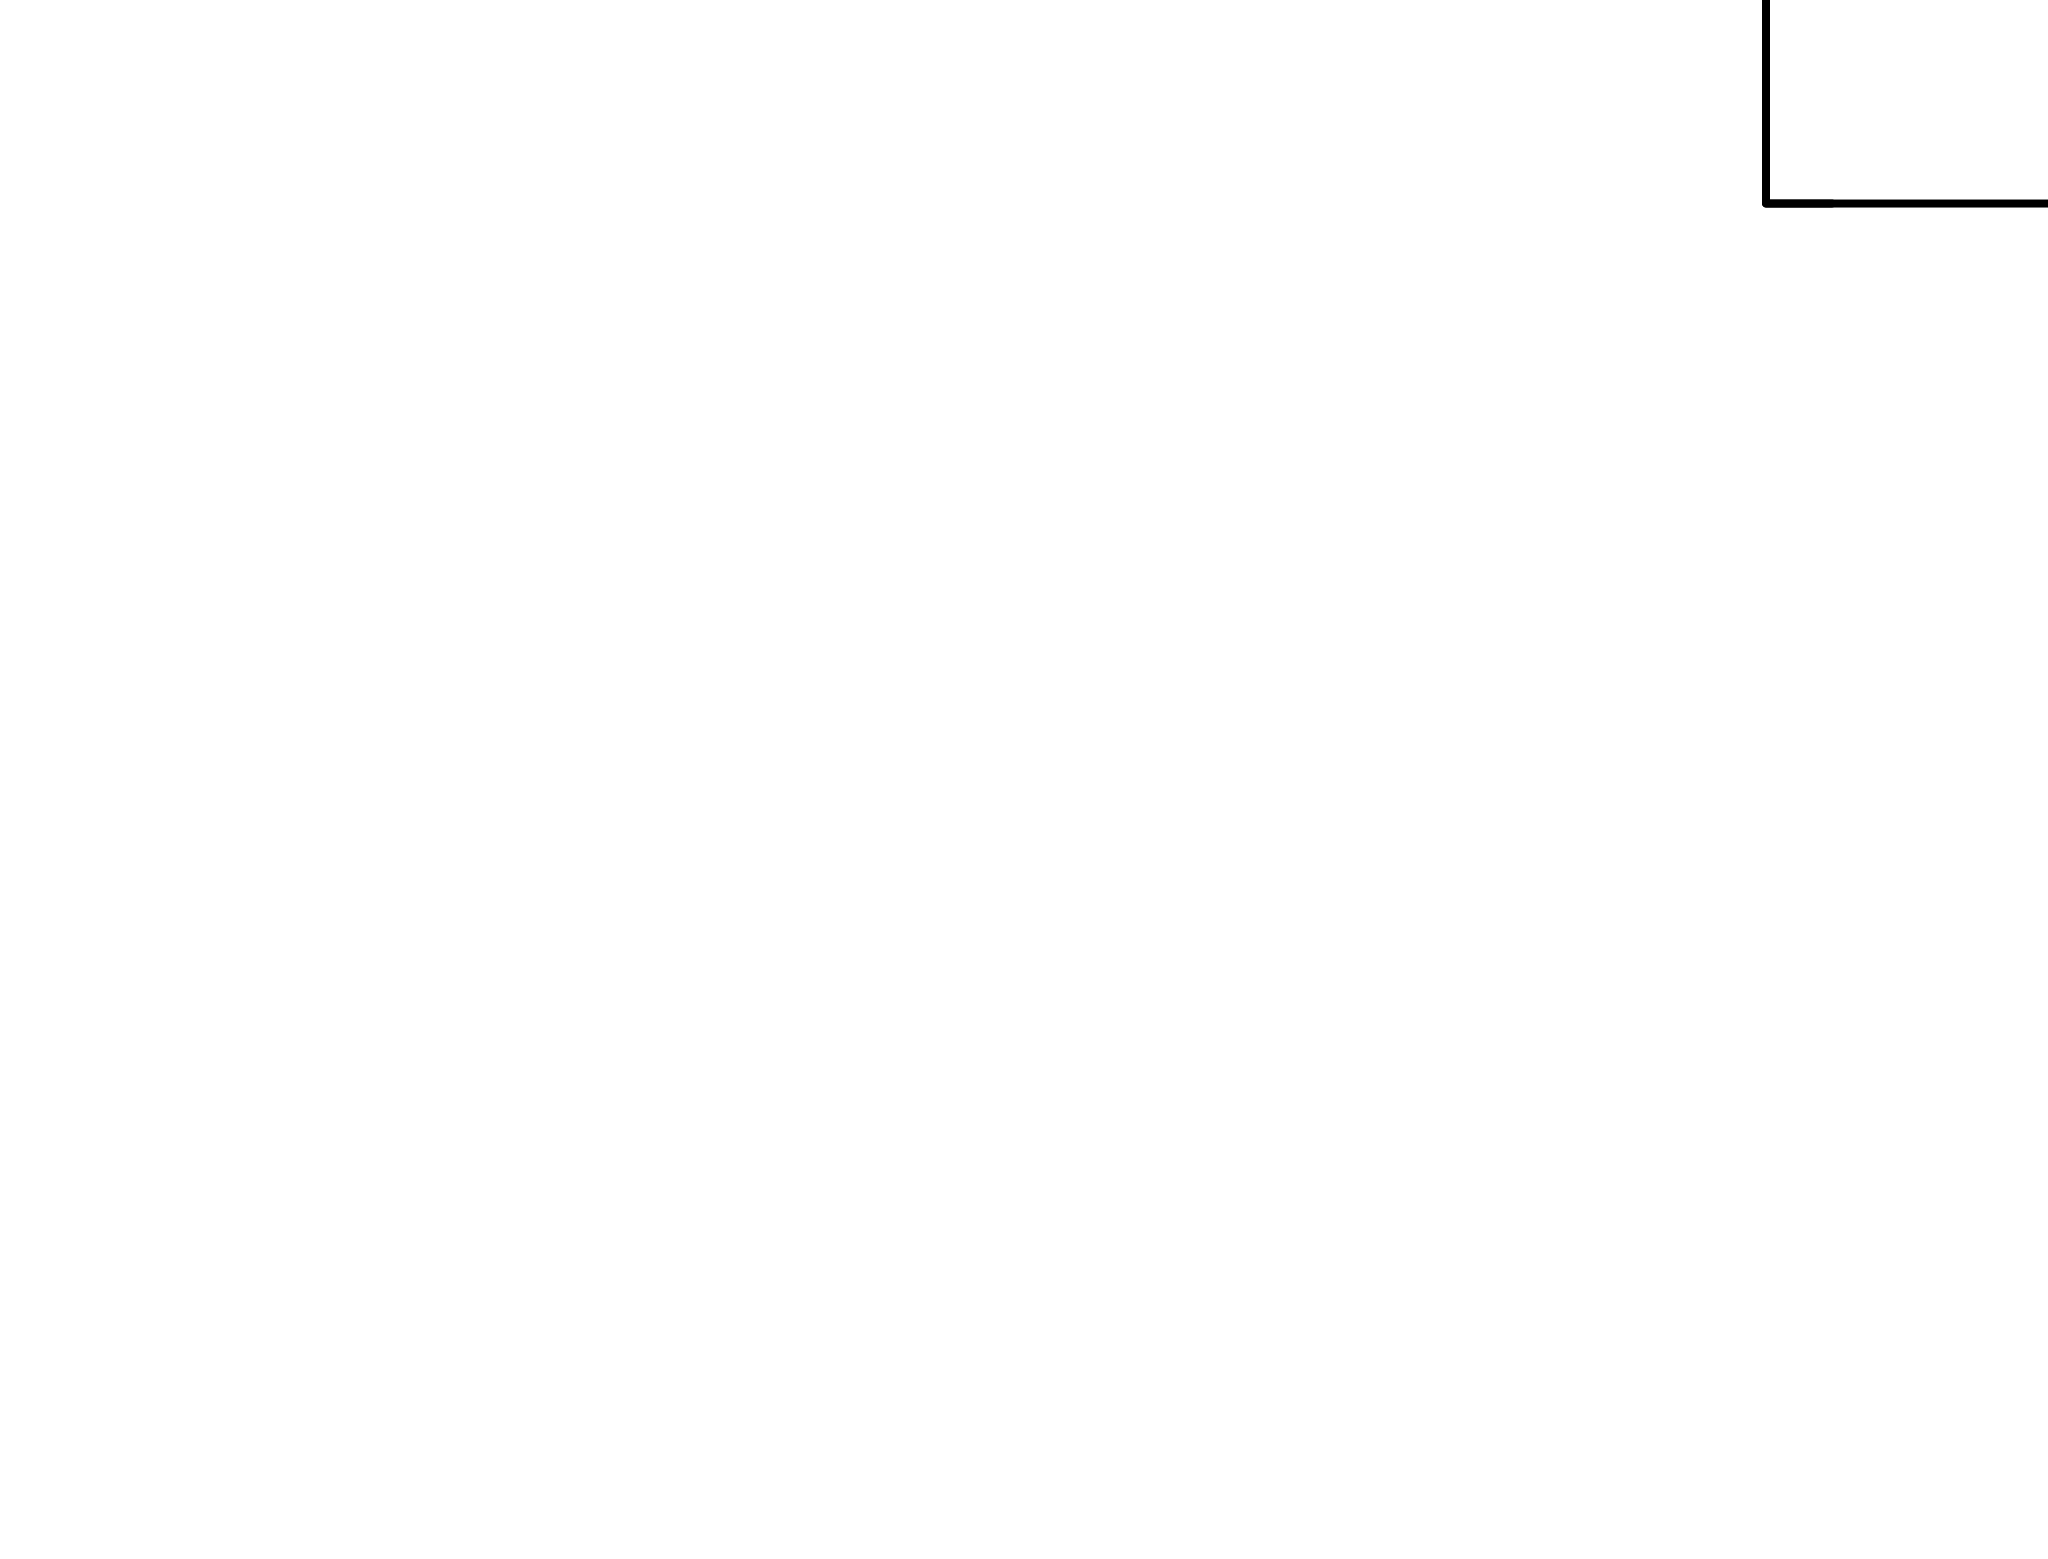

In [8]:
AllData.clear()
AllModels.clear()
spec = Spectrum('0916811501_PN8grpspec.fits')

Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.01")
Plot("data")
#spec.ignore("**-0.2 12.0-**")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.907964e+06     using 7 bins.

Test statistic : Chi-Squared              2.907964e+06     using 7 bins.
 Null hypothesis probability of 0.000000e+00 with 4 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
8.95544      0.0494116    -1       4.85732       1.52076   0.000956294
8.81407      66.3992       0       3.18080       1.50975    0.00101753
8.747        66.5899       0       2.39138       1.52446    0.00129065
8

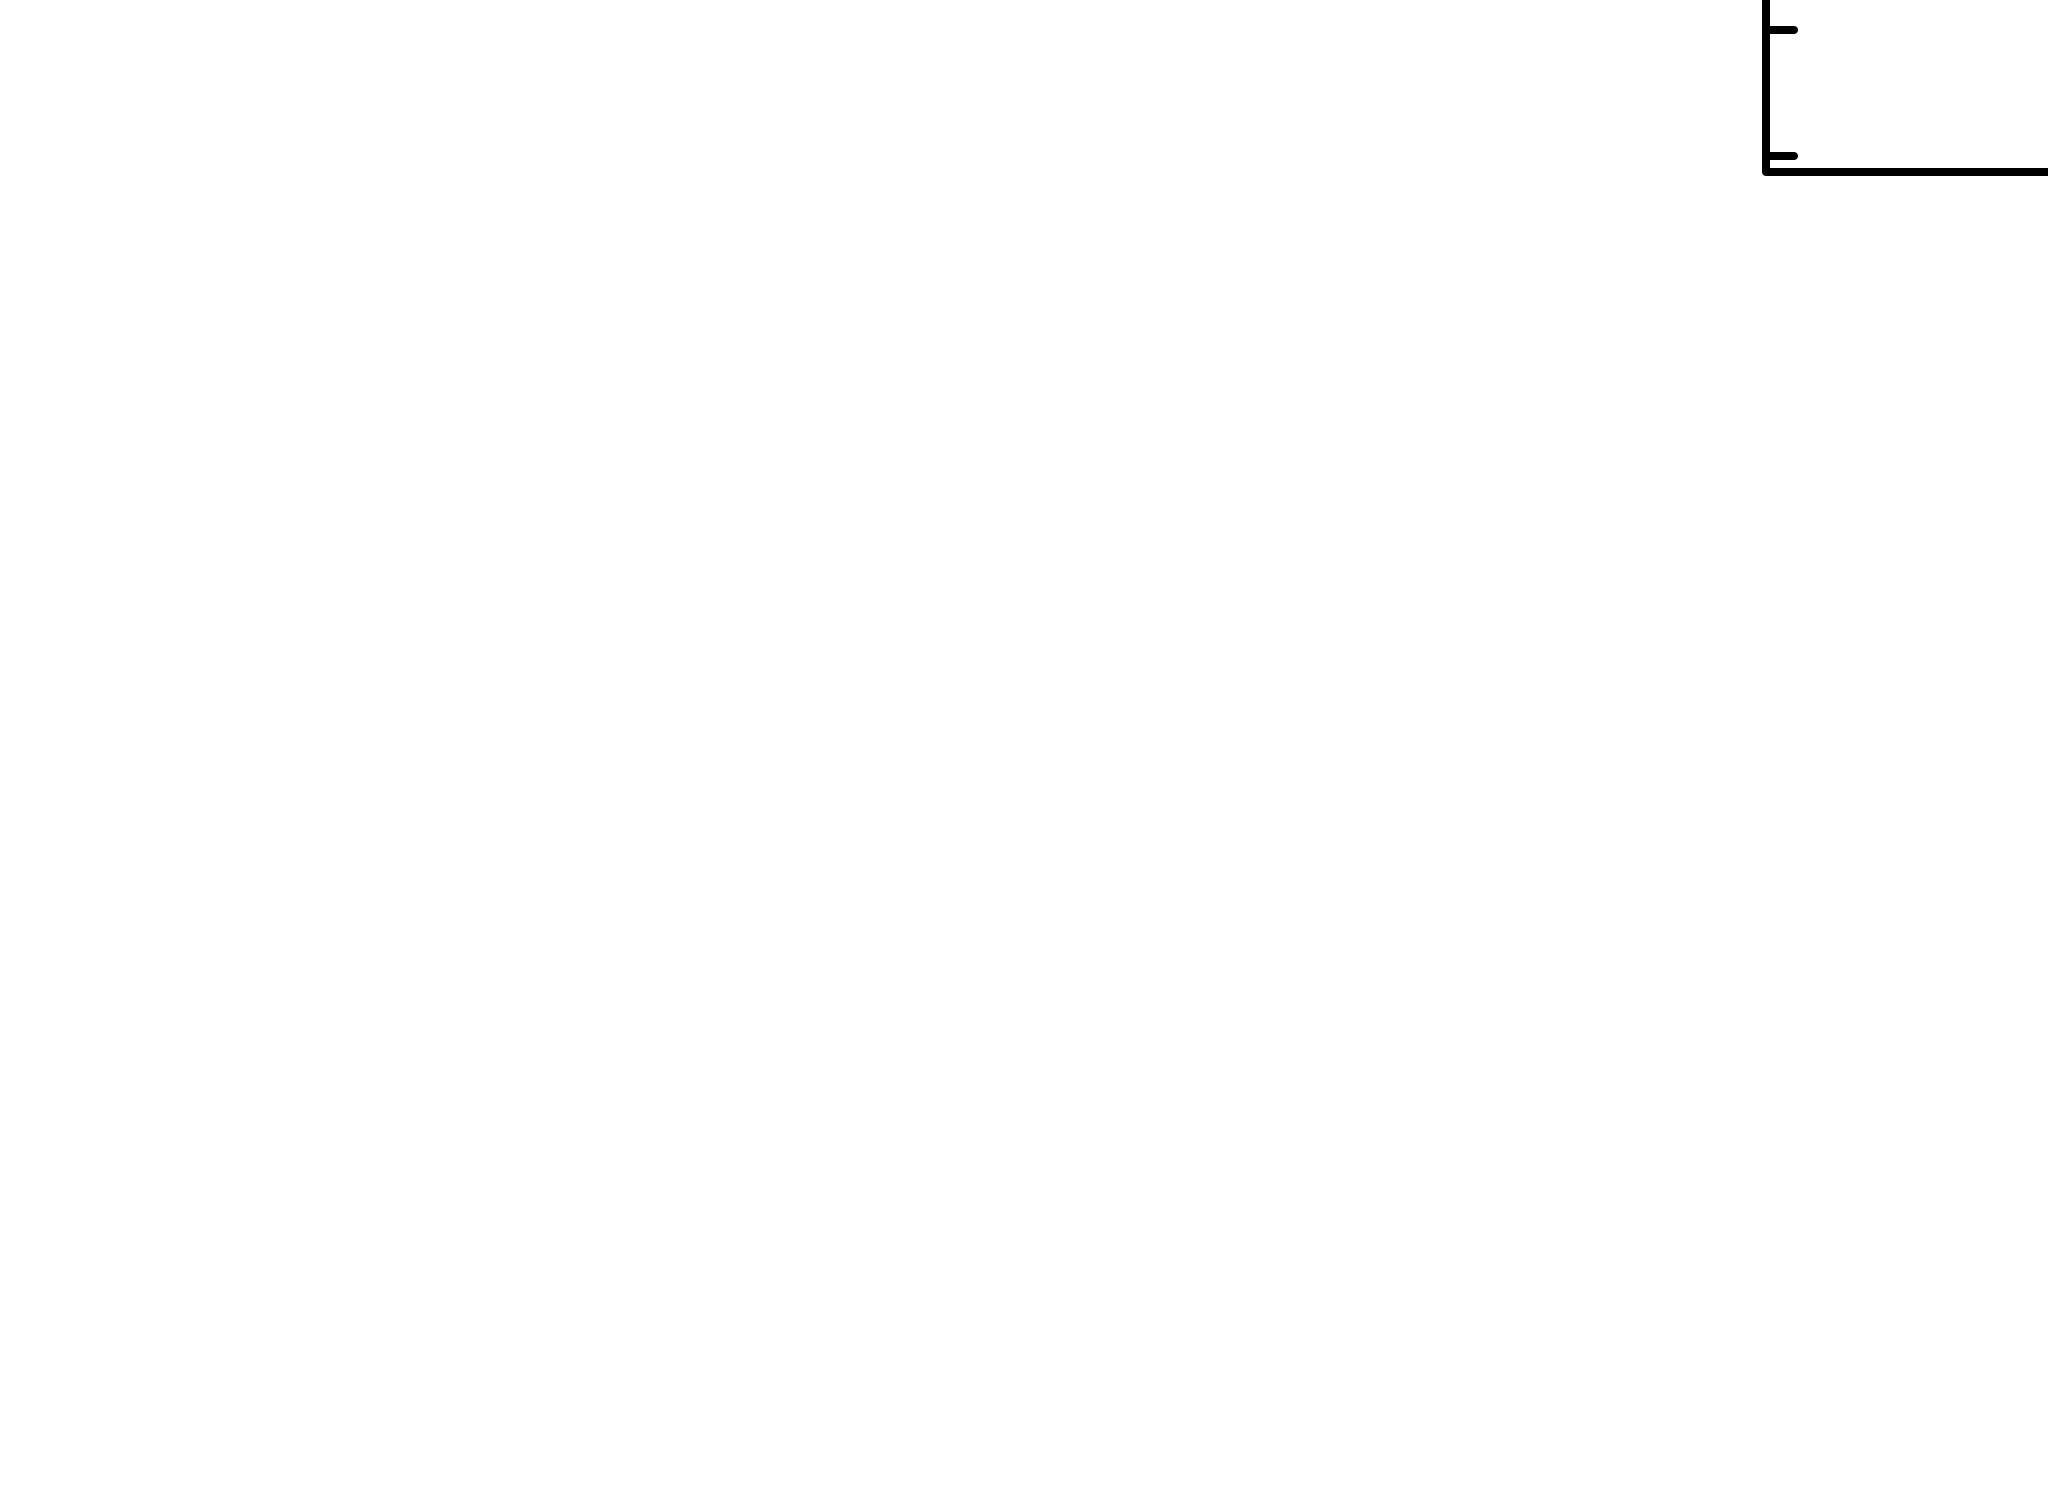

In [9]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")

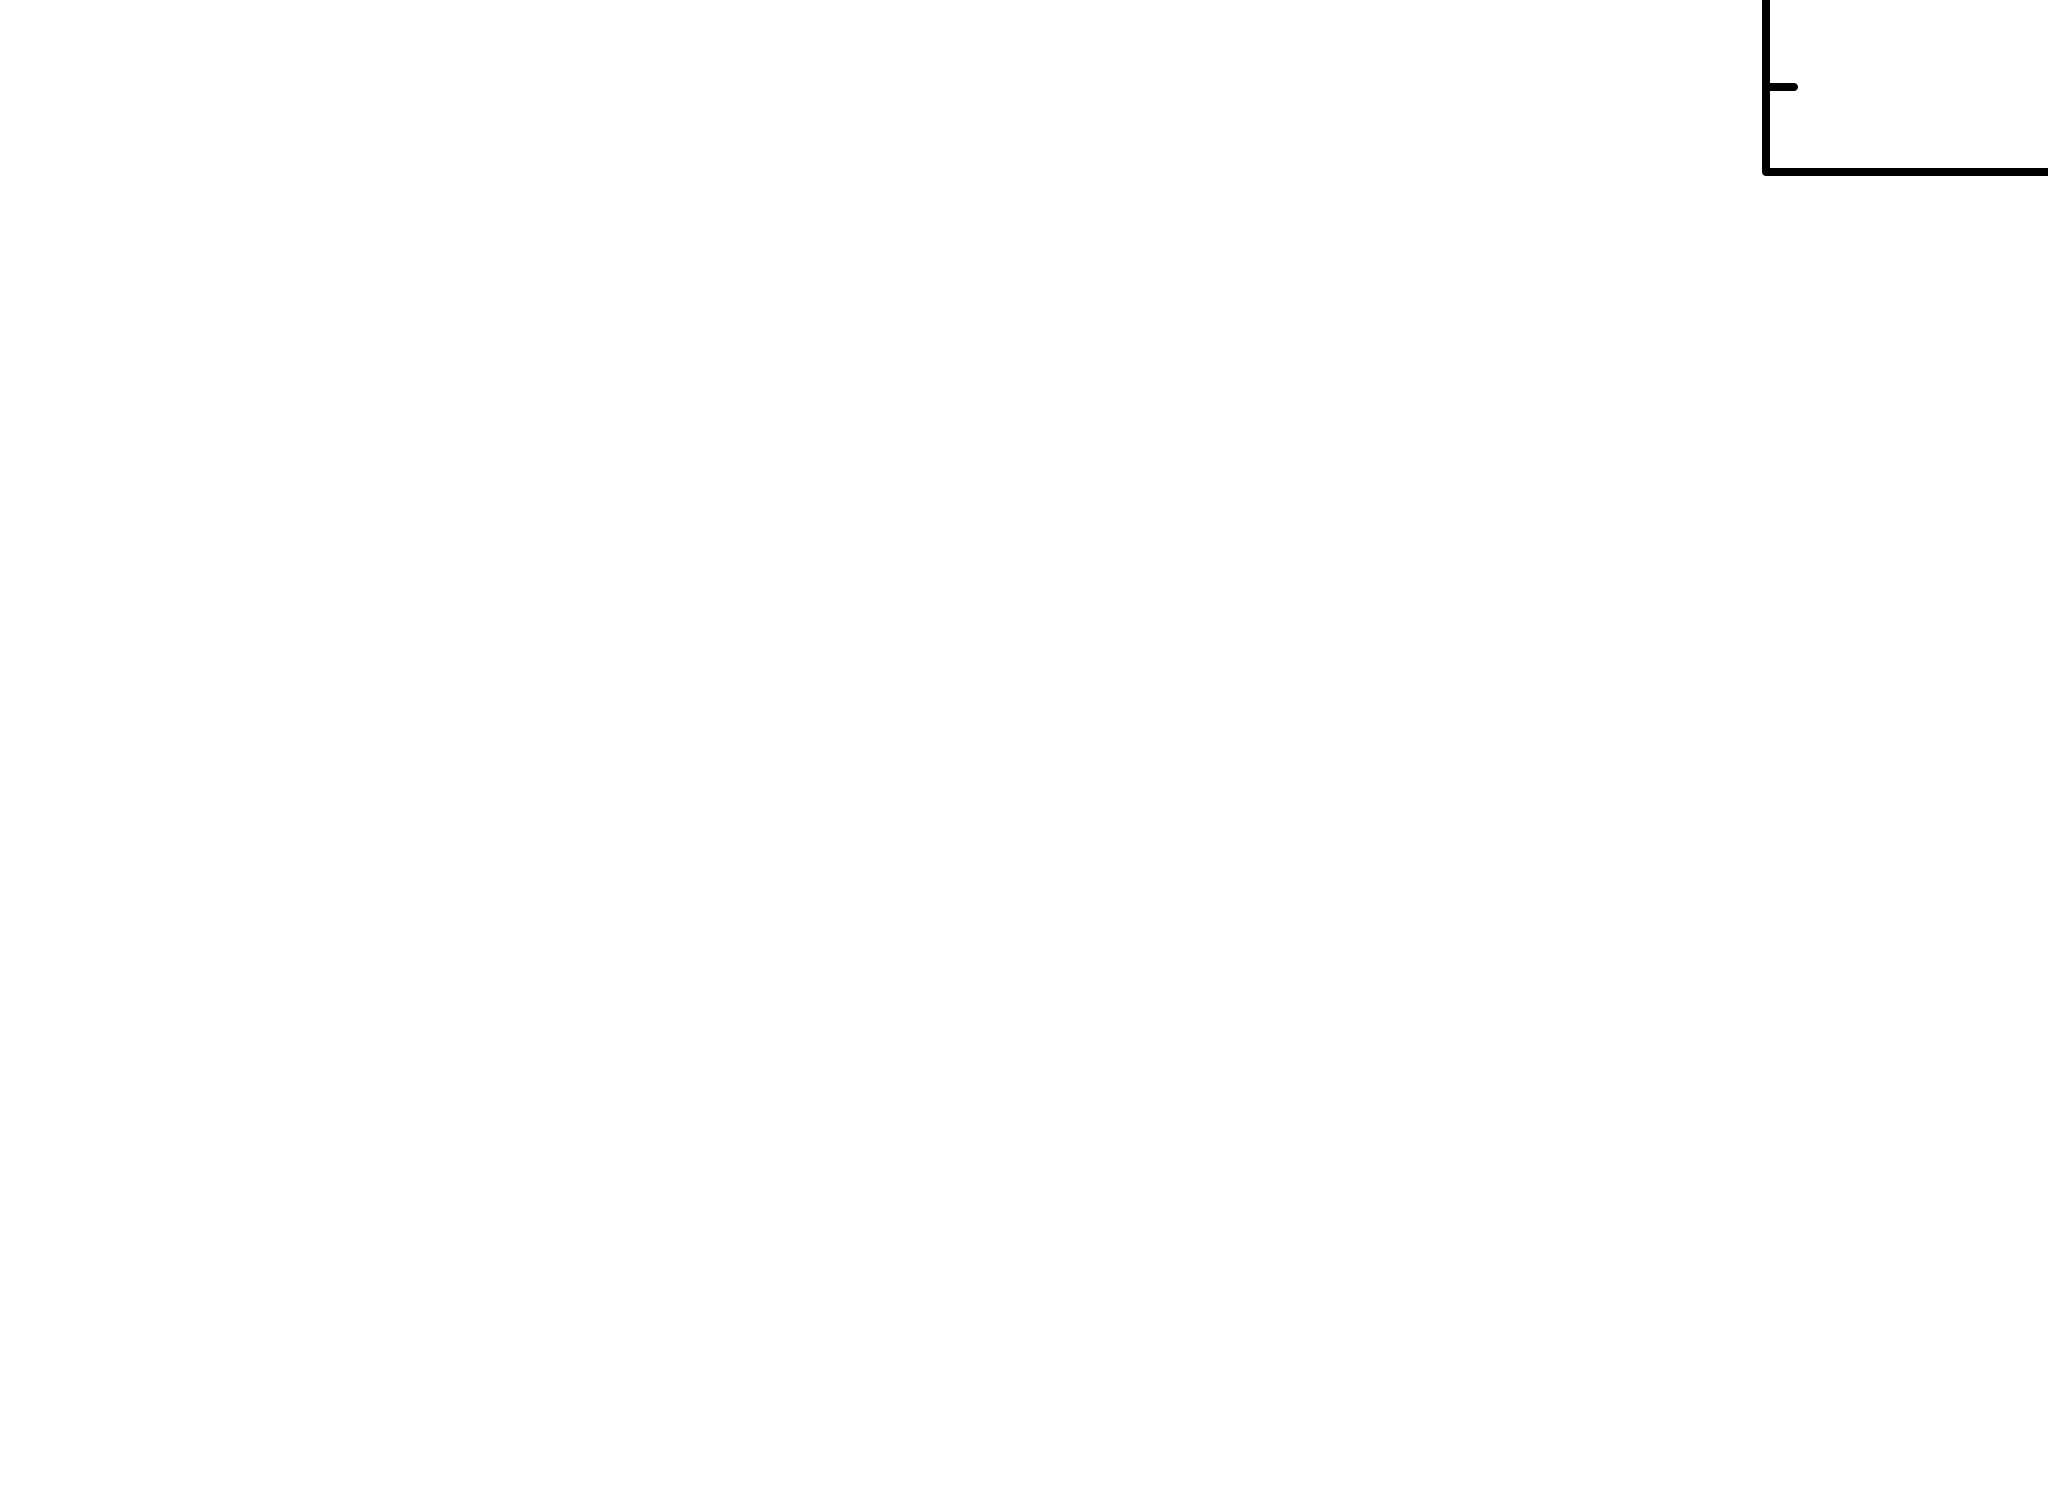


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared                332268.3     using 7 bins.

Test statistic : Chi-Squared                332268.3     using 7 bins.
 Null hypothesis probability of 0.0e+00 with 4 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
9.0026       0.101234     -3       13.3107       1.97228    0.00943497
8.60816      8.01959      -4       5.31750       6.09034    0.00269462
8.48341      31.9457       0       4.44149       5.93376    0.00282284
8.46037     

5.3146       0.103615     -1       24.2637      0.253683       13005.5
5.31195      0.103937     -1       24.3308      0.252955       13595.5
5.30932      0.104159     -1       24.3977      0.252236       14208.3
5.30673      0.105198     -1       24.4641      0.251525       14845.1
5.30416      0.105795     -1       24.5302      0.250823       15505.9
5.30163      0.106919     -1       24.5959      0.250129       16192.2
5.29912      0.106512     -1       24.6612      0.249443       16904.4
5.29665      0.107653     -1       24.7262      0.248765       17643.2
5.2942       0.108175     -1       24.7908      0.248095       18409.7
5.29178      0.108418     -1       24.8550      0.247432       19204.7
5.28938      0.108595     -1       24.9189      0.246776       20029.4
5.28701      0.10925      -1       24.9825      0.246128       20884.0
5.28467      0.109748     -1       25.0457      0.245487       21770.0
5.28236      0.110863     -1       25.1085      0.244853       22688.3
5.2800

In [10]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared                89901.81     using 7 bins.

Test statistic : Chi-Squared                89901.81     using 7 bins.
 Null hypothesis probability of 0.00e+00 with 4 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
 Due to zero model norms, the following fit parameters are temporarily frozen:1 2 
9.56754      63.9

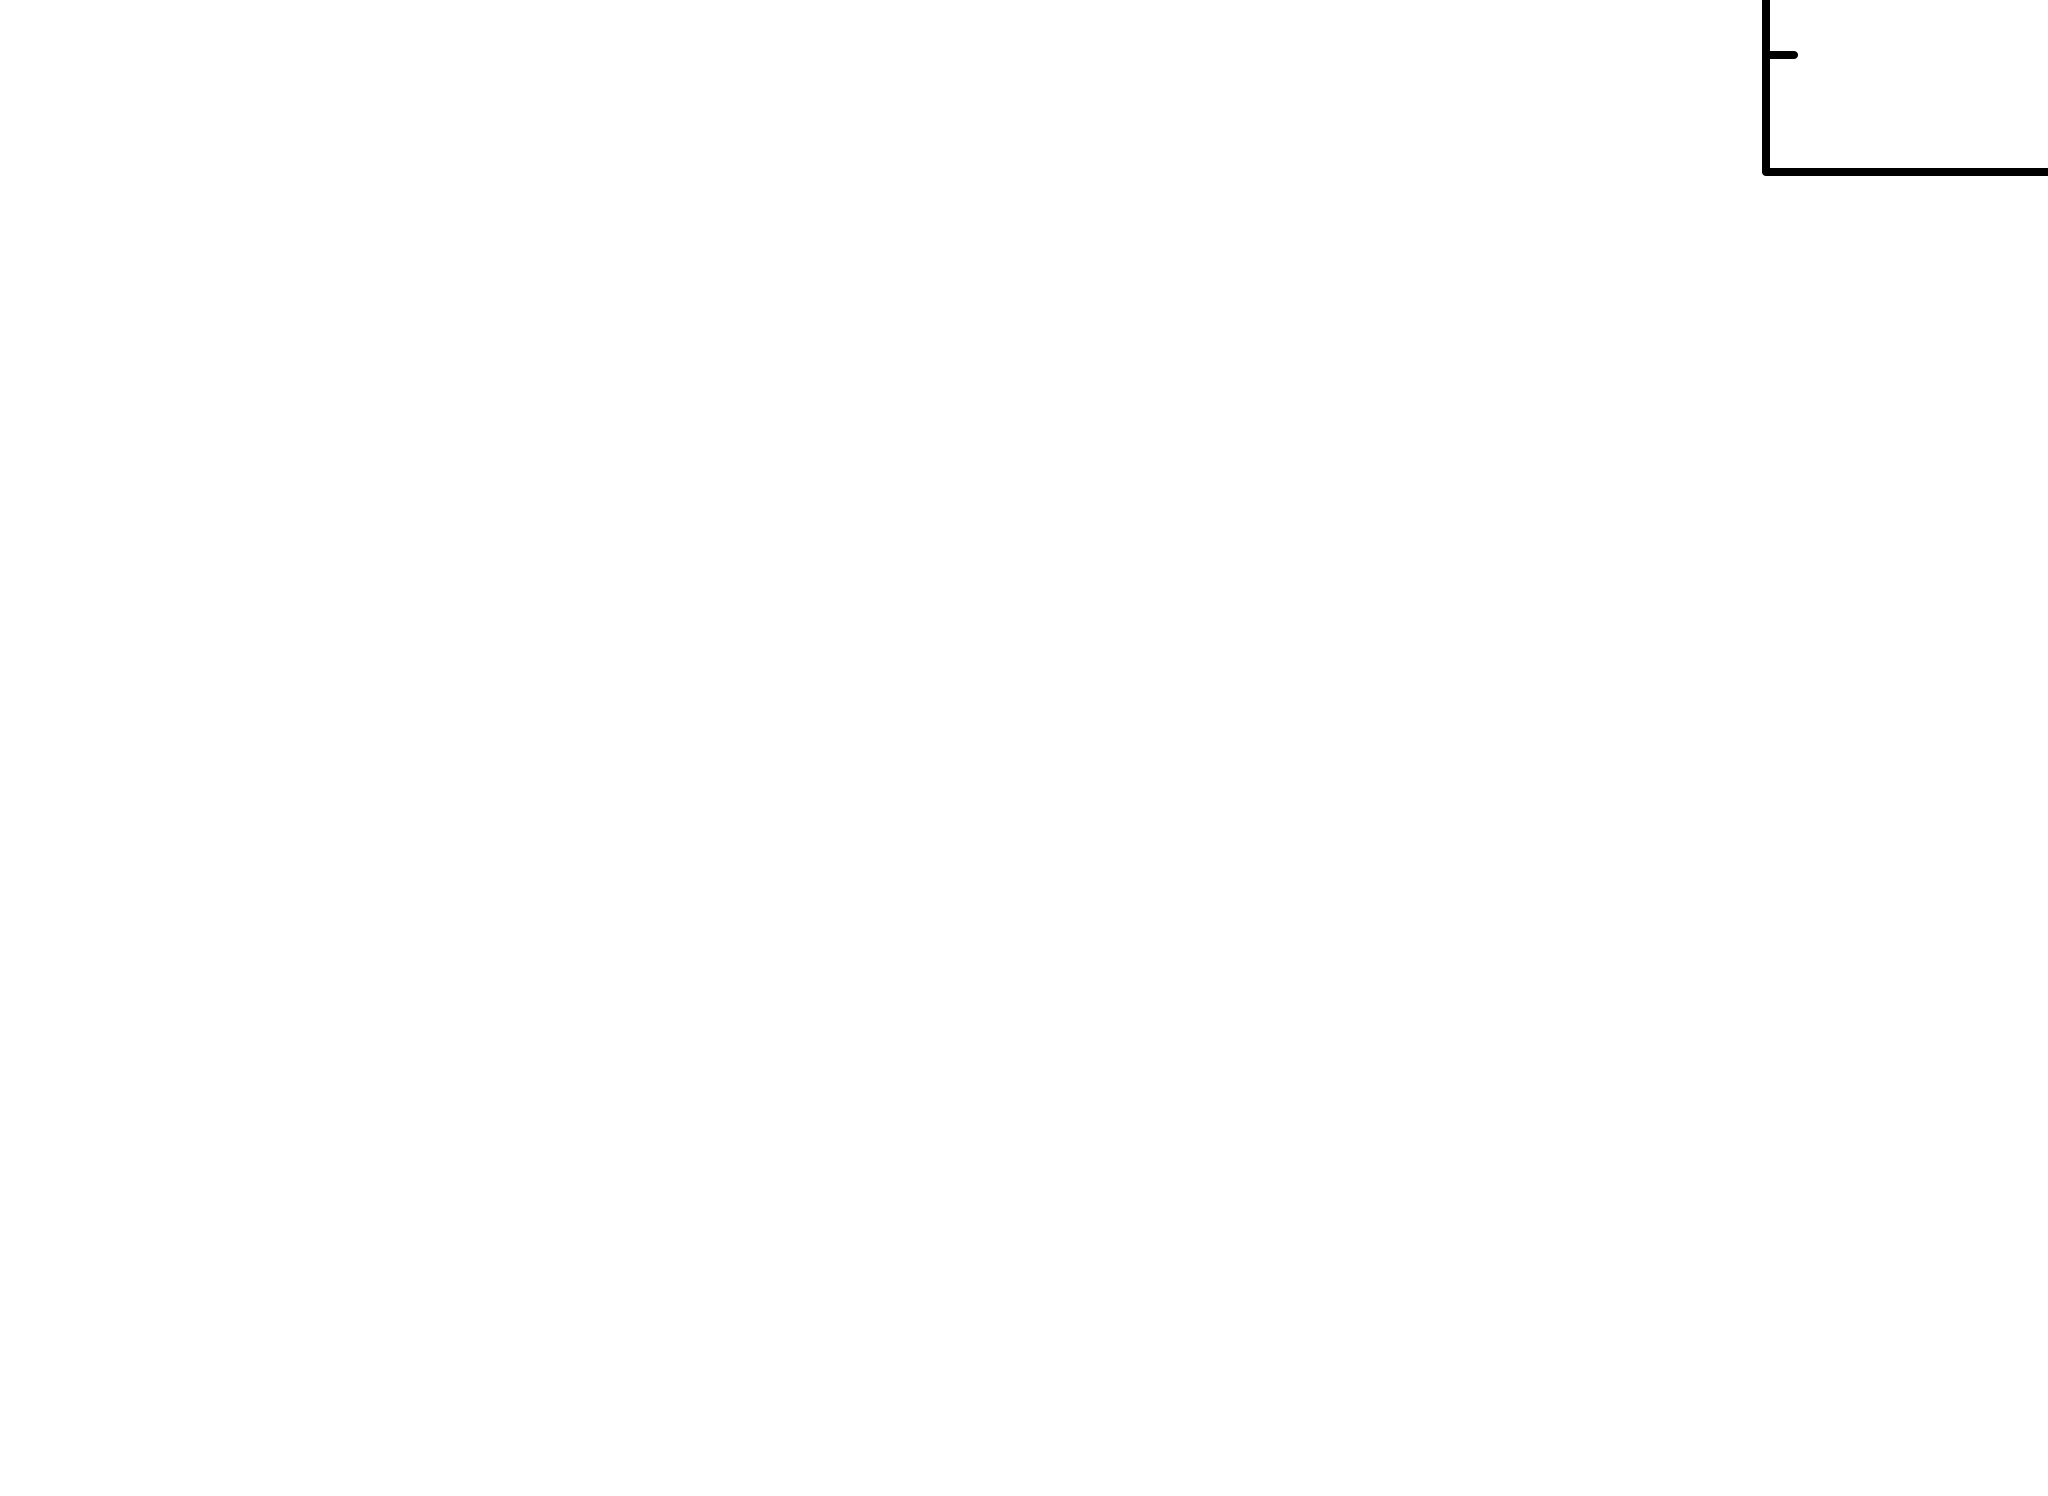

In [11]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.090093e+07     using 7 bins.

Test statistic : Chi-Squared              2.090093e+07     using 7 bins.
 Null hypothesis probability of 0.000000e+00 with 4 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
9.19585      0.00969389   -3      0.393652       1.32554   2.35655e-05
9.05112      2122.34       0      0.660568       1.15254   2.79342e-05
8.91969      2409.63       0      0.938006       1.04872   3.24928e-05
8.71

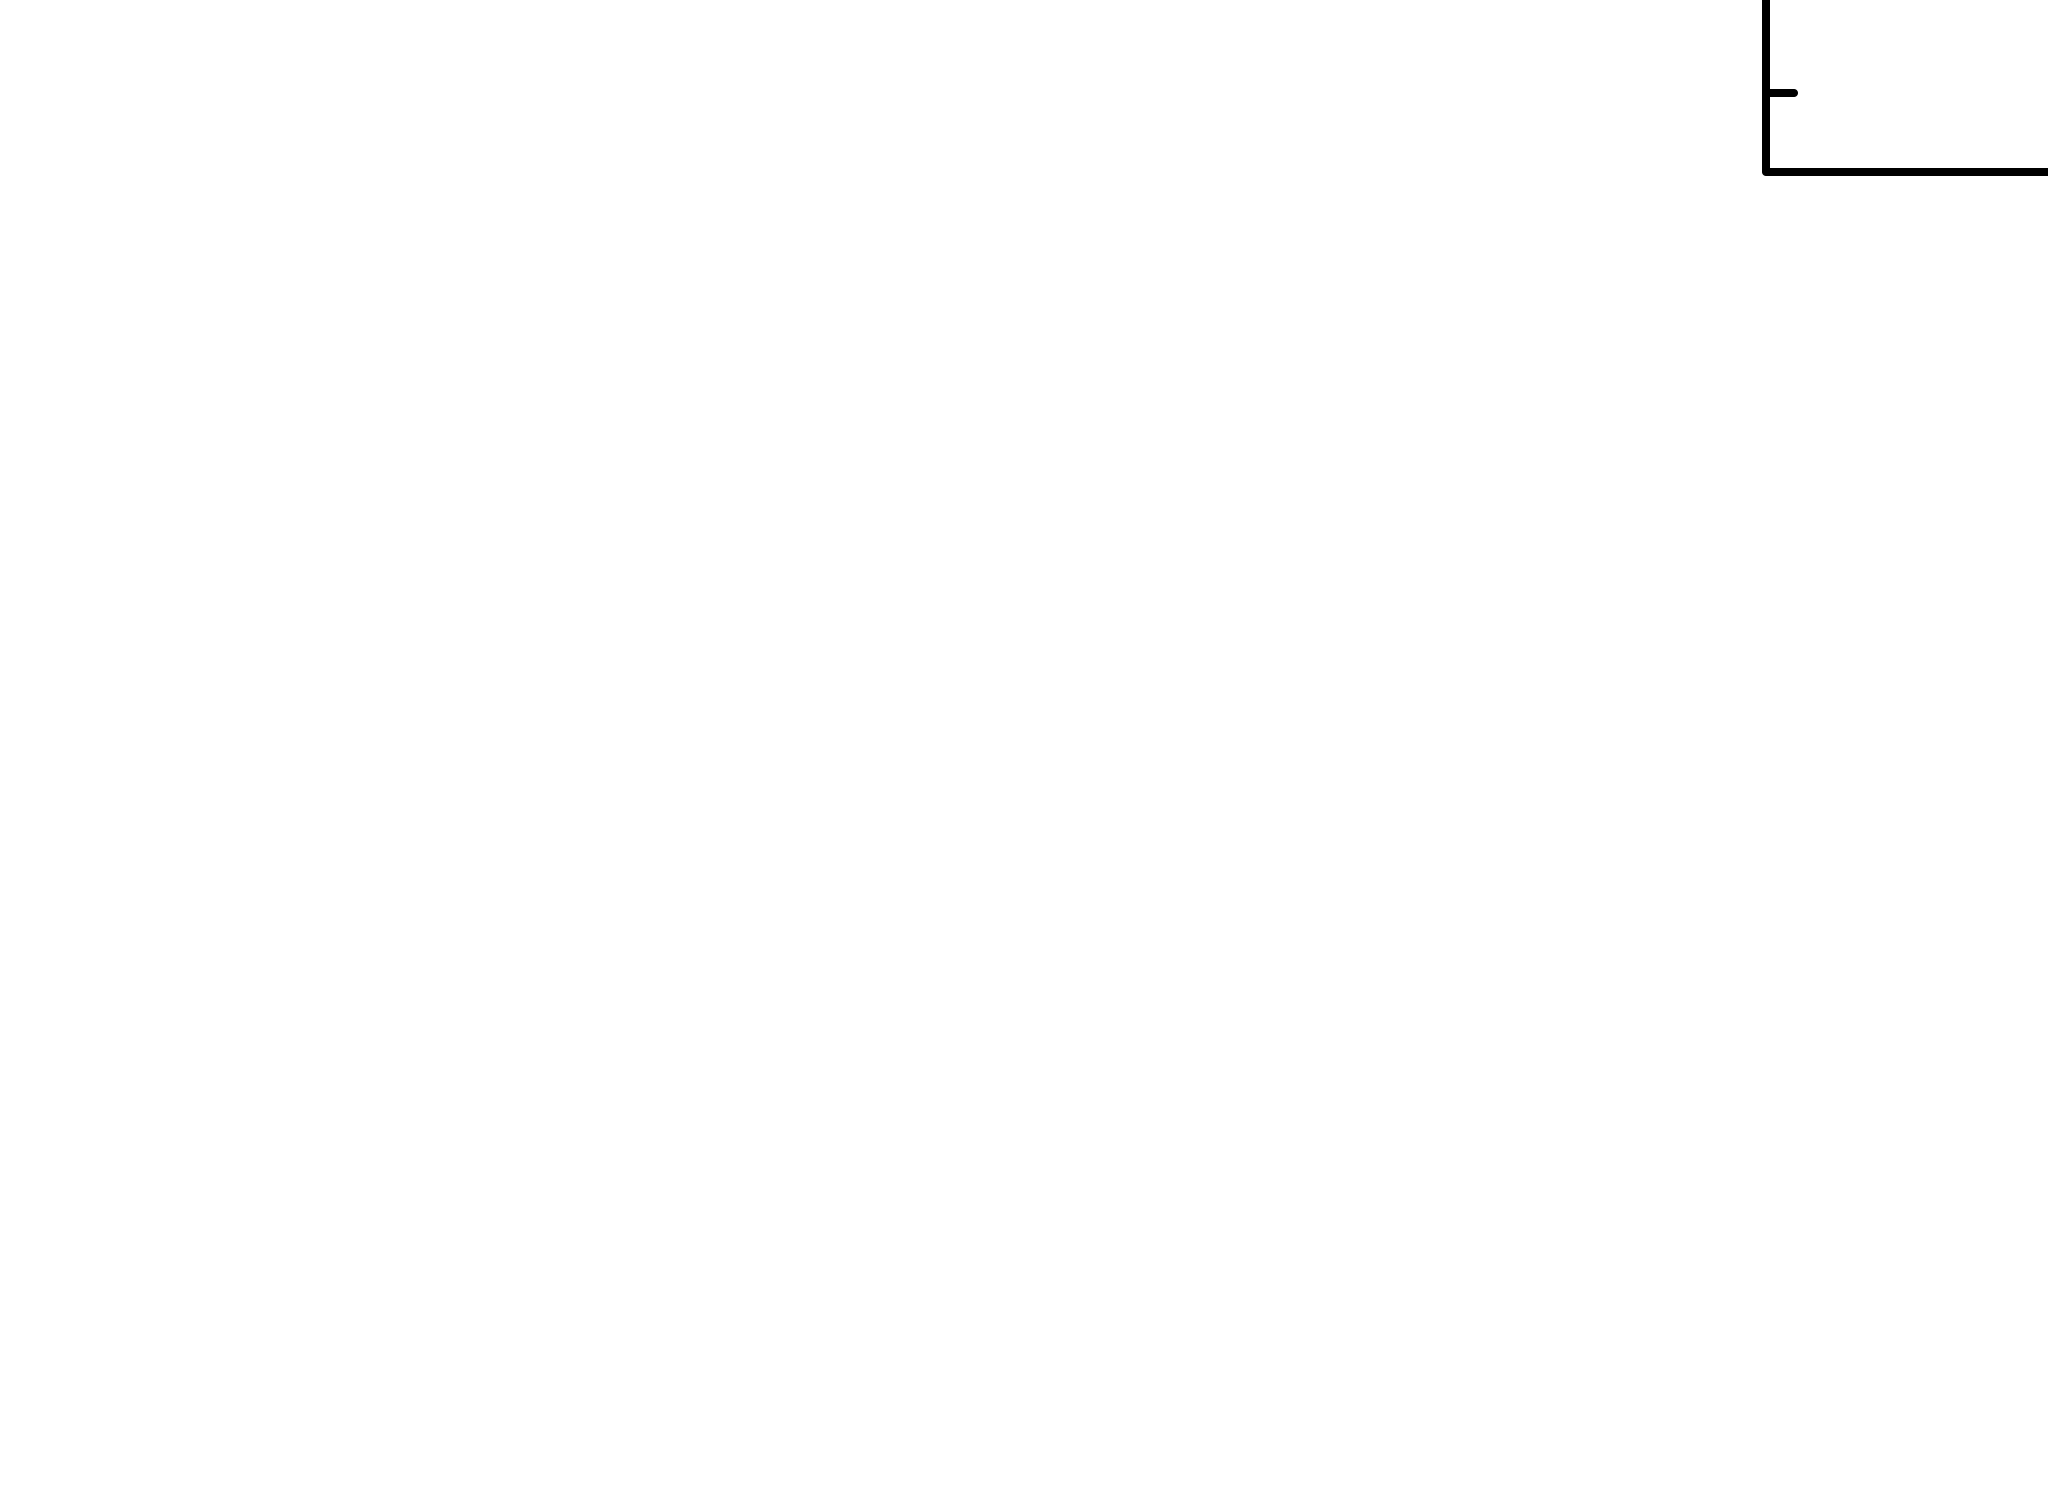

.41905
5.25587      0.106581     -1       23.9697      0.197452       3.58836
5.25282      0.10722      -1       24.0588      0.196873       3.76435
5.24983      0.109213     -1       24.1471      0.196303       3.94726
5.24688      0.109055     -1       24.2345      0.195742       4.13738
5.24398      0.110967     -1       24.3212      0.195188       4.33494
5.24113      0.11085      -1       24.4071      0.194643       4.54022
5.23832      0.112563     -1       24.4923      0.194105       4.75335
5.23556      0.112429     -1       24.5767      0.193576       4.97461
5.23284      0.115008     -1       24.6605      0.193053       5.20431
5.23016      0.115318     -1       24.7436      0.192539       5.44253
5.22752      0.115845     -1       24.8259      0.192031       5.68970
5.22492      0.116586     -1       24.9077      0.191530       5.94598
5.22236      0.118333     -1       24.9886      0.191036       6.21183
5.21983      0.119416     -1       25.0691      0.190548       6.48726

In [15]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")

In [16]:
AllModels.calcFlux(".2 12.0")

 Model Flux 0.0012253 photons (5.6982e-12 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [17]:
#plx = 1.4843
d_kpc = 8
F_x = 5.7*10**-12

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

4.363513385164801e+34


In [18]:
F_opt = 1.05*10**-5 * 10**(-0.4*20.78)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', F_x/F_opt)

Optical Flux:  5.119049146085544e-14
F_x / F_opt:  111.34880399338812
